# Machine Learning on Text: Clustering Assignment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

import re

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Ingest the company_profiles data set into a corpus.

In [4]:
PATH = '/content/drive/MyDrive/Thinkful/NLP/company_profiles/'

DOC_PATTERN = r'.*\.txt'
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

In [5]:
len(corpus.fileids())

3558

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [6]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]

In [7]:
len(docs)

3558

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [8]:
def preprocess(docs):
  # takes a list of documents and preprocesses them (lemmatize, stem, stopwrods, isalpha)
  lemmatizer = WordNetLemmatizer()
  stemmer = SnowballStemmer('english')

  preprocessed = []

  for doc in docs:
    tokenized = word_tokenize(doc)
    cleaned = [stemmer.stem(lemmatizer.lemmatize(token.lower())) for token in tokenized
              if token.lower() not in stopwords.words('english')
              if token.isalpha()]

    untokenized = ' '.join(cleaned)

    preprocessed.append(untokenized)
  return preprocessed

In [9]:
preprocessed = preprocess(docs)

In [10]:
len(preprocessed)

3558

### TF-IDF vectorize the preprocessed documents.

In [11]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform(preprocessed)

In [12]:
tfidf = pd.DataFrame(vectors.toarray(), columns= vectorizer.get_feature_names())
tfidf.head()

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,abak,abaloparatid,abanderado,abandon,abat,abaxi,abbotsford,abbott,abboud,abbvi,abc,abcit,abdomin,abel,abeona,abercrombi,abil,abilen,abilitec,abington,abiom,abirateron,abitibi,abl,ablat,abm,abnorm,aboveground,abra,abras,...,zixarch,zixdirectori,zixencrypt,zixit,zixon,zixprotect,znbr,zodiac,zoe,zoeti,zogenix,zohydro,zolmitriptan,zomajet,zombi,zone,zonedirector,zoneplann,zoo,zorba,zosano,zoster,zowi,zseri,zulili,zume,zumiez,zuramp,zurich,zurn,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.240561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

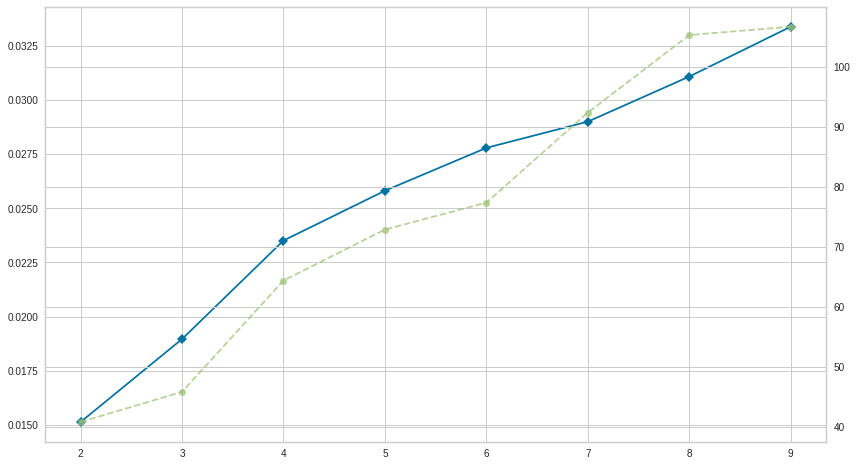

In [14]:
model = KMeans()

plt.figure(figsize=(14,8))
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(tfidf)
plt.show()

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [15]:
model = KMeans(n_clusters = 4)
clusters = model.fit_predict(tfidf)

### Perform Agglomerative Clustering using the same number of clusters.

In [16]:
model = AgglomerativeClustering(n_clusters=4)
aggloclusters = model.fit_predict(tfidf)

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [17]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 4

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i])
            for i in topic.argsort()[:-num_keywords-1:-1]]
          for topic in model.components_]

results

[[('loan', 2.1091163694839214),
  ('bank', 1.39606578932406),
  ('deposit', 1.0315502813686448),
  ('account', 0.9026559310737102),
  ('servic', 0.7135952099767534)],
 [('servic', 0.8612682259631149),
  ('product', 0.7703904545350685),
  ('segment', 0.6043695353907798),
  ('solut', 0.5647197062139725),
  ('system', 0.5616145371773564)],
 [('gas', 1.182147831631649),
  ('natur', 0.9067002575963827),
  ('oil', 0.895666162630323),
  ('energi', 0.4857491511442433),
  ('texa', 0.3880628579381175)],
 [('invest', 1.3213313123553154),
  ('fund', 0.9035362706499058),
  ('incom', 0.4709486248492867),
  ('equiti', 0.45630525068940453),
  ('manag', 0.4525763161302028)]]

In [18]:
from sklearn.decomposition import LatentDirichletAllocation

num_keywords = 5
num_topics = 4

vectorizer = TfidfVectorizer() # Traditionally CountVectorizer()
model = LatentDirichletAllocation(n_components=num_topics,
                                  learning_method='online')

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i])
            for i in topic.argsort()[:-num_keywords-1:-1]]
          for topic in model.components_]

results

[[('coor', 0.8166509284353594),
  ('molson', 0.7526592341157652),
  ('revlon', 0.6447433372690358),
  ('aerocenturi', 0.5571116232640847),
  ('burlingam', 0.5275314914689899)],
 [('cabaret', 1.1909280301295289),
  ('sauvignon', 0.8179708217743108),
  ('pinot', 0.802386306697408),
  ('cabernet', 0.8023560354075111),
  ('willamett', 0.7440862665658464)],
 [('servic', 195.62462389391095),
  ('product', 150.67152087432777),
  ('compani', 147.968162232453),
  ('loan', 129.38121445979718),
  ('segment', 115.55712064080336)],
 [('treatment', 40.880222312375906),
  ('clinic', 34.328010839251725),
  ('develop', 31.72937576859136),
  ('phase', 30.53657152861088),
  ('trial', 26.924840600578236)]]

In [19]:
from sklearn.decomposition import TruncatedSVD

num_keywords = 5
num_topics = 4

vectorizer = TfidfVectorizer() # Traditionally CountVectorizer()
model = TruncatedSVD(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i])
            for i in topic.argsort()[:-num_keywords-1:-1]]
          for topic in model.components_]

results

[[('loan', 0.33338672880641596),
  ('servic', 0.30004289063780454),
  ('bank', 0.23639826423726257),
  ('compani', 0.18164041272586778),
  ('product', 0.1794549087181398)],
 [('loan', 0.4434539306552292),
  ('bank', 0.26536754564798254),
  ('deposit', 0.2076133876153306),
  ('account', 0.17416977851679244),
  ('estat', 0.10539533238420536)],
 [('gas', 0.40689211543002746),
  ('natur', 0.32068700289308005),
  ('oil', 0.3124161851034703),
  ('energi', 0.15455995031500266),
  ('texa', 0.13602946864179613)],
 [('invest', 0.4762915994568111),
  ('fund', 0.3485382524689091),
  ('incom', 0.17941980324460105),
  ('manag', 0.17910026667224302),
  ('equiti', 0.15307423400031087)]]

#Lecture Notes

In [20]:
from nltk.corpus import gutenberg
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [21]:
guten_docs = [gutenberg.raw(fileid) for fileid in gutenberg.fileids()]
len(guten_docs)

18

In [22]:
guten_preprocessed = preprocess(guten_docs)

In [23]:
guten_vectorizer = TfidfVectorizer()

guten_vectors = guten_vectorizer.fit_transform(guten_preprocessed)

guten_vector_df = pd.DataFrame(guten_vectors.toarray(),
                               columns = guten_vectorizer.get_feature_names())

guten_vector_df.head()

,aaron,aaronit,ab,aback,abaddon,abaft,abagtha,abana,abandon,abarim,abas,abash,abassin,abat,abba,abbana,abbey,abbeyland,abbot,abbrevi,abda,abdeel,abdi,abdic,abdiel,abdomen,abdon,abe,abeam,abednego,abel,abelard,abelbethmaachah,abelmaim,abelmeholah,abelmizraim,abelshittim,aberr,abey,abez,...,ziza,zizah,zmite,zoan,zoar,zoba,zobah,zobebah,zodiac,zodiack,zoetrop,zogranda,zohar,zoheleth,zoheth,zola,zone,zoo,zook,zoolog,zophah,zophai,zophar,zophiel,zophim,zorah,zorathit,zoreah,zorit,zoroast,zorobabel,zso,zuar,zumpt,zuph,zur,zuriel,zurishaddai,zuyder,zuzim
0,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.011735,0.000000,0.000621,0.000000,0.0000,0.0000,0.000544,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
1,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000964,0.0000,0.0000,0.000000,0.001072,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
2,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00044,0.000000,0.00000,0.0,0.0,0.000542,0.000000,0.0,0.000000,0.000819,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000
3,0.030433,0.0002,0.0,0.0,0.0001,0.0,0.0001,0.0001,0.00000,0.000351,0.00071,0.0,0.0,0.000398,0.000301,0.0,0.000000,0.000000,0.000000,0.000000,0.0002,0.0001,0.000263,0.000000,0.000088,0.0,0.000802,0.0,0.0,0.001316,0.001403,0.0,0.0002,0.0001,0.000301,0.0001,0.0001,0.0,0.0,0.0001,...,0.0002,0.0001,0.0,0.000701,0.001002,0.0002,0.001102,0.0001,0.0,0.0,0.0,0.0,0.000401,0.0001,0.0001,0.0,0.0,0.0,0.0,0.0,0.0002,0.0001,0.000401,0.0,0.0001,0.000802,0.0001,0.0001,0.0001,0.0,0.000301,0.0,0.000501,0.0,0.000301,0.000501,0.0001,0.000501,0.0,0.0001
4,0.000000,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.00000,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0000,...,0.0000,0.0000,0.0,0.000000,0.000000,0.0000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.000000,0.0,0.0000,0.000000,0.0000,0.0000,0.0000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.0000


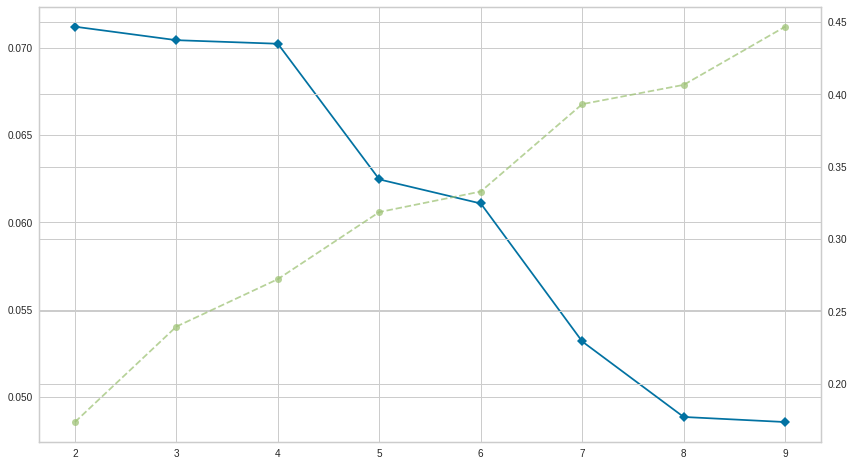

In [24]:
model = KMeans()

plt.figure(figsize=(14,8))
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(guten_vector_df)
plt.show()

In [25]:
model = KMeans(n_clusters=3)
guten_clusters = model.fit_predict(guten_vector_df)

In [26]:
guten_clusters

array([2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1], dtype=int32)

In [27]:
guten_df = pd.DataFrame(guten_docs, columns=['Text'])

In [28]:
guten_df['cluster'] = guten_clusters

In [29]:
guten_df['title'] = gutenberg.fileids()

In [30]:
guten_df

,Text,cluster,title
0,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...,2,austen-emma.txt
1,[Persuasion by Jane Austen 1818]\n\n\nChapter ...,2,austen-persuasion.txt
2,[Sense and Sensibility by Jane Austen 1811]\n\...,2,austen-sense.txt
3,[The King James Bible]\n\nThe Old Testament of...,1,bible-kjv.txt
4,[Poems by William Blake 1789]\n\n \nSONGS OF I...,1,blake-poems.txt
5,[Stories to Tell to Children by Sara Cone Brya...,2,bryant-stories.txt
6,[The Adventures of Buster Bear by Thornton W. ...,2,burgess-busterbrown.txt
7,[Alice's Adventures in Wonderland by Lewis Car...,2,carroll-alice.txt
8,[The Ball and The Cross by G.K. Chesterton 190...,2,chesterton-ball.txt
9,[The Wisdom of Father Brown by G. K. Chesterto...,2,chesterton-brown.txt


In [31]:
model = AgglomerativeClustering(n_clusters=3)
guten_aggloclusters = model.fit_predict(guten_vector_df)
guten_df['agglocluster'] = guten_aggloclusters

In [32]:
guten_df

,Text,cluster,title,agglocluster
0,[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAP...,2,austen-emma.txt,0
1,[Persuasion by Jane Austen 1818]\n\n\nChapter ...,2,austen-persuasion.txt,0
2,[Sense and Sensibility by Jane Austen 1811]\n\...,2,austen-sense.txt,0
3,[The King James Bible]\n\nThe Old Testament of...,1,bible-kjv.txt,2
4,[Poems by William Blake 1789]\n\n \nSONGS OF I...,1,blake-poems.txt,2
5,[Stories to Tell to Children by Sara Cone Brya...,2,bryant-stories.txt,0
6,[The Adventures of Buster Bear by Thornton W. ...,2,burgess-busterbrown.txt,0
7,[Alice's Adventures in Wonderland by Lewis Car...,2,carroll-alice.txt,0
8,[The Ball and The Cross by G.K. Chesterton 190...,2,chesterton-ball.txt,0
9,[The Wisdom of Father Brown by G. K. Chesterto...,2,chesterton-brown.txt,0


In [33]:
guten_vector_df.shape

(18, 24366)

In [34]:
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 8

vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(guten_preprocessed)
model.fit_transform(vectorized)
guten_nmf_df = pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())
guten_nmf_df

,aaron,aaronit,ab,aback,abaddon,abaft,abagtha,abana,abandon,abarim,abas,abash,abassin,abat,abba,abbana,abbey,abbeyland,abbot,abbrevi,abda,abdeel,abdi,abdic,abdiel,abdomen,abdon,abe,abeam,abednego,abel,abelard,abelbethmaachah,abelmaim,abelmeholah,abelmizraim,abelshittim,aberr,abey,abez,...,ziza,zizah,zmite,zoan,zoar,zoba,zobah,zobebah,zodiac,zodiack,zoetrop,zogranda,zohar,zoheleth,zoheth,zola,zone,zoo,zook,zoolog,zophah,zophai,zophar,zophiel,zophim,zorah,zorathit,zoreah,zorit,zoroast,zorobabel,zso,zuar,zumpt,zuph,zur,zuriel,zurishaddai,zuyder,zuzim
0,0.000000,0.000000,0.000361,0.000565,0.000000,0.000724,0.000000,0.000000,0.004086,0.000000,0.001392,0.000509,0.000000,0.002048,0.000000,0.000000,0.009015,0.000000,0.000000,0.001293,0.000000,0.000000,0.000000,0.000264,0.000000,0.000735,0.000000,0.000724,0.000362,0.000220,0.000214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001103,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001811,0.000000,0.000000,0.000362,0.000000,0.000000,0.000000,0.000000,0.003549,0.000000,0.000361,0.000351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000368,0.000000
1,0.014517,0.000086,0.000000,0.000000,0.000043,0.000000,0.000043,0.000043,0.002622,0.000907,0.000971,0.003426,0.000864,0.000578,0.000128,0.000864,0.000000,0.000000,0.000000,0.000000,0.000086,0.000043,0.000107,0.000396,0.003817,0.000916,0.000342,0.000000,0.000000,0.000552,0.000590,0.000000,0.000086,0.000043,0.000128,0.000043,0.000043,0.000000,0.001374,0.000043,...,0.000086,0.000043,0.000000,0.000300,0.000428,0.000086,0.000471,0.000043,0.000000,0.001727,0.000000,0.000000,0.000171,0.000043,0.000043,0.000000,0.003974,0.000000,0.000000,0.000000,0.000086,0.000043,0.000171,0.000864,0.000043,0.000342,0.000043,0.000043,0.000043,0.000000,0.000128,0.000000,0.000214,0.000000,0.000128,0.000214,0.000043,0.000214,0.000458,0.000043
2,0.000611,0.000004,0.000010,0.000000,0.000002,0.000000,0.000002,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.000000,0.000259,0.000000,0.000000,0.000000,0.000004,0.000002,0.000004,0.000000,0.000000,0.000000,0.000017,0.000000,0.000000,0.000024,0.000026,0.000000,0.000004,0.000002,0.000006,0.000002,0.000002,0.000000,0.000000,0.000002,...,0.000004,0.000002,0.000000,0.000015,0.000021,0.000004,0.000023,0.000002,0.000000,0.000000,0.000000,0.000000,0.000009,0.000002,0.000002,0.000000,0.000811,0.000000,0.000010,0.000000,0.000004,0.000002,0.000009,0.000000,0.000002,0.000017,0.000002,0.000002,0.000002,0.000000,0.000006,0.000000,0.000011,0.000000,0.000006,0.000011,0.000002,0.000011,0.000000,0.000002
3,0.000000,0.000000,0.000087,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000000,0.000120,0.000021,0.000224,0.000000,0.000021,0.007394,0.000338,0.000260,0.000371,0.000000,0.000000,0.000226,0.000420,0.000092,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000087,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [35]:
for i, topic in enumerate(model.components_):
  print('topic', i)
  for i in topic.argsort()[:-num_keywords -1 :-1]:
    print(vectorizer.get_feature_names()[i], topic[i])
  print('-------------')

topic 0
said 0.41470821443243316
littl 0.3270915969434639
one 0.31729544596386833
whale 0.2982575062914302
like 0.2140221758719194
-------------
topic 1
thee 0.3851095509927366
thou 0.3689622508719795
thi 0.32495255482676755
shall 0.28588104940183623
unto 0.23879508202483316
-------------
topic 2
haue 0.5662636407325012
macb 0.2947410793421559
ham 0.29224873013123975
bru 0.21885741190675986
vpon 0.2094100216931424
-------------
topic 3
elinor 0.22993699949034999
could 0.20371470355640917
emma 0.19531069612930604
would 0.1821365561396043
mariann 0.17173346232121683
-------------
topic 4
buster 0.5784902069003037
joe 0.23086282944007816
littl 0.2299910037987076
blacki 0.1500760438973538
farmer 0.14625754338386046
-------------
topic 5
alic 0.6505128457938714
said 0.33364398754464886
littl 0.10882517591984367
gryphon 0.09866395054697923
duchess 0.08767212471034463
-------------
topic 6
syme 0.6783426854211089
said 0.2111547432381739
gregori 0.12853689114338993
professor 0.1285014400508952

In [36]:
from sklearn.decomposition import LatentDirichletAllocation

num_keywords = 5
num_topics = 10

vectorizer = TfidfVectorizer() # Traditionally CountVectorizer()
model = LatentDirichletAllocation(n_components=num_topics,
                                  learning_method='online')

vectorized = vectorizer.fit_transform(guten_preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i])
            for i in topic.argsort()[:-num_keywords-1:-1]]
          for topic in model.components_]

results

[[('intimaci', 0.36389081651165744),
  ('jezaniah', 0.3590139841939474),
  ('leviti', 0.35340610695779445),
  ('michah', 0.35320493302516626),
  ('haul', 0.3531411959189626)],
 [('gonzago', 0.36760081887653356),
  ('happier', 0.36401512380334944),
  ('carrion', 0.3632537591188547),
  ('mass', 0.35733873957134304),
  ('accid', 0.3573366016627653)],
 [('bayader', 0.35786959105736305),
  ('habitatori', 0.3561030216588023),
  ('niger', 0.3502951747779798),
  ('coven', 0.3493638139289349),
  ('celtic', 0.34758083955729807)],
 [('said', 2.029709860899546),
  ('one', 1.5384706845127198),
  ('littl', 1.3917618660725277),
  ('like', 1.2800827154251089),
  ('man', 1.2013589222422678)],
 [('lovest', 0.3860733148822327),
  ('mackintosh', 0.37246124892861515),
  ('elinor', 0.3706664596887608),
  ('fran', 0.3701576033131811),
  ('azal', 0.36121974023928505)],
 [('tortuous', 0.37507545895624694),
  ('esaia', 0.35714004301411495),
  ('sulley', 0.35258287964463625),
  ('kenaz', 0.3517511272141007),
  (

In [37]:
from sklearn.decomposition import TruncatedSVD

num_keywords = 5
num_topics = 10

vectorizer = TfidfVectorizer() # Traditionally CountVectorizer()
model = TruncatedSVD(n_components=num_topics)

vectorized = vectorizer.fit_transform(guten_preprocessed)
model.fit_transform(vectorized)

results = [[(vectorizer.get_feature_names()[i], topic[i])
            for i in topic.argsort()[:-num_keywords-1:-1]]
          for topic in model.components_]

results

[[('said', 0.2604458179749705),
  ('one', 0.18595960802038555),
  ('littl', 0.16665251688575639),
  ('like', 0.14745810757466546),
  ('man', 0.13586006865549846)],
 [('haue', 0.3059461744582589),
  ('thou', 0.25942640370934844),
  ('thee', 0.22293585122214385),
  ('thi', 0.19936752517220552),
  ('shall', 0.17394313874778833)],
 [('thee', 0.18671582988530894),
  ('thi', 0.14270511874466388),
  ('heaven', 0.13726576818161007),
  ('unto', 0.13410325296668035),
  ('thou', 0.13106162914180583)],
 [('elinor', 0.2570568156556582),
  ('mariann', 0.18505215417536078),
  ('emma', 0.18417583641218618),
  ('elliot', 0.14828779304499598),
  ('mr', 0.13741409857683878)],
 [('buster', 0.5424655840695493),
  ('littl', 0.23541944520667657),
  ('joe', 0.2175665589476224),
  ('blacki', 0.14072332776578125),
  ('farmer', 0.13872175897978692)],
 [('alic', 0.574039317458943),
  ('said', 0.2209206026268631),
  ('unto', 0.18408383609407292),
  ('shall', 0.10092092809914138),
  ('lord', 0.09277883558086464)],
